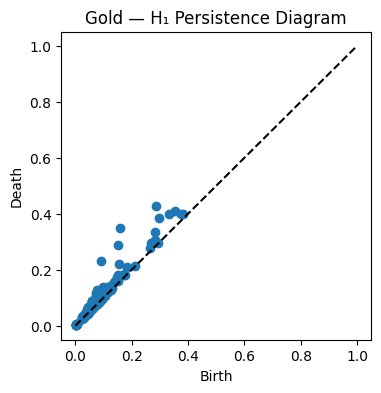

In [1]:
import sys
from pathlib import Path
PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT / "src"))

import numpy as np
import matplotlib.pyplot as plt
from cycle_tda.io import load_csv
from cycle_tda.embeddings import delay_embedding
from cycle_tda.ph import compute_diagrams

df = load_csv(PROJECT_ROOT / "data/raw/XAU_Monthly.csv",
              date_col="Date", value_col="Close")

y = np.log(df["Close"].values)
y = y[~np.isnan(y)]

m, tau = 3, 6
X = delay_embedding(y, m, tau)
dgms = compute_diagrams(X)

plt.figure(figsize=(4,4))
dgm = dgms[1]
if len(dgm) > 0:
    plt.scatter(dgm[:,0], dgm[:,1])
    lim = max(dgm.max(), 1)
    plt.plot([0,lim],[0,lim],'k--')
plt.title("Gold — H₁ Persistence Diagram")
plt.xlabel("Birth")
plt.ylabel("Death")
plt.show()
